In [22]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable
%load_ext autoreload
%autoreload 2
%matplotlib qt

# Localização de zeros de funções

## $ \S 1 $ Introdução

Um ponto $ \zeta $ (_zeta_) do domínio de uma função $ f $ de uma variável é dito um **zero** de $ f $ caso
$$ f(\zeta) = 0\, .$$
Também dizemos que $ \zeta $ é uma **raiz** de uma equação em uma variável, digamos,
\begin{equation*}\label{E:raiz}
g(x) = h(x)\,, \tag{1}
\end{equation*}
se $ g(\zeta) = h(\zeta) $.

📝 Observe que encontrar uma raiz de \eqref{E:raiz} é equivalente a encontrar um zero de 
$$
f(x) = g(x) - h(x)\,.
$$

A localização de raízes de equações é um dos problemas mais freqüentes em
Ciência e Engenharia. Entretanto, a sua solução _analítica_ é difícil ou
impossível mesmo nos casos mais simples. 

Em compensação, existem vários _métodos numéricos_ gerais que nos permitem
encontrar zeros de funções contínuas arbitrárias com alta precisão e baixo uso
de recursos computacionais, por mais complicadas que sejam estas funções, e.g.:
$$
f(x) = e^{3x^2\sin x\,}\big[\cos(5x) + 2\big]^{x^2+1} - \frac{7}{\sqrt{|x|+1}}
$$

📝 Ainda que todas as funções usuais estudadas em Cálculo possam ser estendidas
a funções de uma variável complexa, estaremos interessados aqui em encontrar
apenas os _zeros reais de uma função real contínua de uma variável_. Não
obstante, algumas das técnicas que estudaremos, em especial o método de Newton,
também podem ser aplicadas a funções complexas.

## $ \S 2 $ Funções matemáticas em Python

__Exemplo 1:__ Para definir uma função "matemática" $ f $ em Python, digamos aquela dada por
$$
    f(x) = \frac{\cos(e^{\sqrt{x}} \ln x)}{3}\,,
$$
temos duas alternativas: usar as construções `def` ou `lambda`.

In [3]:
# Primeiro importamos do NumPy as funções necessárias para definir f:
from numpy import cos, exp, log

_Alternativa 1:_ Como uma função matemática é um caso especial de um
procedimento, podemos usar `def` para defini-la:

In [5]:
def f(x):    # Note o ':' no final.
    return cos(exp(x**1/2) * log(x)) / 3    # Retornando o valor de f em x.

A primeira linha da declaração contém o nome da função (neste caso, `f`) e a
sua _assinatura_, que consiste dos seus _parâmetros_ entre
parênteses separados por vírgulas (neste caso há apenas um parâmetro, `x`). A
assinatura deve terminar com `:`.

O resto da declaração deve ser indentado para indicar o início de um bloco, o
do _conteúdo_ da função. Sem esta indentação o interpretador acusará um erro
(experimente). Neste bloco temos uma ou mais declarações que
controlam as ações que devem ser executadas a cada vez que a função é chamada.
A instrução que começa com `return` especifica a _saída_ ou _output_ da função. Uma
determinada função pode conter uma, várias ou nenhuma instrução deste tipo.

Para _chamar_ ou _avaliar_ a função num determinado argumento, digamos 4,
utilizamos o nome da função seguido pelo(s) argumento(s) entre parênteses:

In [10]:
print(f(4))       # Imprimindo f(4).
print(f(1))       # Imprimindo f(1).
print(type(f))    # Verificando o tipo de f.
print(type(f(1))) # Verificando o tipo de f(1).


-0.22774102708488655
0.3333333333333333
<class 'function'>
<class 'numpy.float64'>


Quando chamamos uma função, aos parâmetros na assinatura da função são
atribuídos os valores específicos dos argumentos que foram passados entre
parênteses na chamada, exatamente na ordem em que foram listados. Então o
conteúdo da definição é executado até que o interpretador se depare com uma
instrução `return`. Quando isto acontece, a expressão a seguir é retornada como
saída.  Se nenhuma instrução `return` for encontrada, quando o bloco do conteúdo
terminar de ser executado, a função retorna `None` por default.

Assim, no nosso exemplo, a chamada `f(4)` acima causa que `x` receba o valor $ 4
$ e que o conteúdo da definição de `f` seja executado. Como este conteúdo
consiste de uma única instrução `return`, a chamada simplesmente calcula o valor
da expressão à direita para `x = 4` e o retorna como saída.

_Alternativa 2:_ Usando a construção `lambda` podemos definir `f` de maneira
mais concisa. Ela deve ser preferida quando $ f $ é uma função matemática
definida de maneira simples.

In [ ]:

f = lambda x: cos(exp(x**1/2) * log(x)) / 3
# Lê-se: "f é a função que leva x em <expressão à direita de ':'> ."

print(f(4))       # Imprimindo f(4).
print(f(1))       # Imprimindo f(1).
print(type(f))    # Verificando o tipo de f.
print(type(f(1))) # Verificando o tipo de f(1).

📝 Estas duas maneiras de se definir `f` diferem apenas superficialmente. Para o
interpretador, as duas definições são equivalentes no sentido que criam objetos
idênticos, para todos os efeitos práticos.

Qualquer uma das duas construções também pode ser usada para definir funções
de mais de uma variável, por exemplo, a função 
$$
h(x, y, z) = x y^2 z^3\,.
$$

In [17]:
def h_1(x, y, z):
    return x * y**2 * z**3

h_2 = lambda x, y, z: x * y**2 * z**3
print(h_1(2, 1, 1), h_2(2, 1, 1))
print(h_1(1, 2, 1), h_1(1, 2, 1))
print(h_1(1, 1, 2), h_2(1, 1, 2))


2 2
4 4
8 8


Se simplesmente chamarmos a função num argumento, digamos com:

In [15]:
h_2(0, 1, 2)

0

então este valor será não apenas impresso, mas retornado como _saída_ da
célula atual. Se forem feitas várias chamadas deste tipo, apenas o valor da
última será impresso e retornado:

In [16]:
h_2(0, 1, 2)
h_2(1, 1, 1)

1

__Problema 1:__ Usando ambas as construções `def` e `lambda`, defina as funções
seguintes e avalie-nas fazendo $ x = \frac{\pi}{2} $, $ y = 0 $, $ z = e $:

(a) $ \displaystyle{f(x) = \frac{x^3 + 2x - 3}{\log_{10} \vert{x}\vert}} $.

(b) $ \displaystyle{g(x) = \frac{\tan (ex)}{1 + \sqrt[3]{x}}} $.

(c) $ \displaystyle{h(x, y, z) = \cos(x + y) \sin(x - y)}\ln z $.

_Dica:_ Em (b), observe que $ \sqrt[3]{x} = x^{\frac{1}{3}} $. Em todos os itens, é necessário importar funções especiais do NumPy; você pode procurá-las [aqui](https://numpy.org/doc/stable/reference/routines.math.html).

_Solução:_

__Problema 2:__ Seja $ t $ (em porcento) a taxa de rendimento anual oferecida
por um título de dívida pública. Então, desconsiderando os impostos, se
aplicarmos um montante inicial $ a $ por $ n $ anos, o valor que receberemos ao
final deste período será:
$$
a \bigg(1 + \frac{t}{100}\bigg)^n\,.
$$

(a) Construa uma função `lucro` que, dados $ a $, $ n $ e $ t $, retorna o lucro
(diferença entre o montante recebido e o aplicado) resultante.

(b) Construa uma função `aplicacao` que, dados $ n $, $ t $ e um montante final
desejado $ b $, retorna o montante $ a $ que precisa ser aplicado inicialmente
para receber $ b $ após $ n $ anos com taxa de rendimento anual $ t $.

*Solução:*

## $ \S 3 $ Dificuldades na identificação exata de zeros

O sistema de ponto flutuante empregado em computação impõe restrições
inevitáveis à precisão do cálculo dos valores de uma função. Por isto na prática
não podemos esperar encontrar um ponto $ \zeta $ onde a função valha exatamente
$ 0 $, como ilustrado no exemplo abaixo. Em vez disto, buscamos encontrar um
*intervalo* suficientemente pequeno onde a função troca de sinal, ou um número
cuja distância de um zero podemos garantir ser pequena o suficiente.

**Problema 3:** Considere os polinômios
$$ p(x) = 2x - 0.2 \qquad \text{e} \qquad q(x) = 3 x - 0.3 $$
Note que $ a = \frac{1}{10} $ é um zero tanto de $ p $ quanto de $ q $.

(a) Usando `lambda`, defina $ p(x) $ e $ q(x) $ como funções em Python.

(b) Agora defina um procedimento `checa_zero(f, x)` que, dados uma função $ f $ e um número $ x $ em seu domínio, retorna `True` se `f(x) == 0` e `False` caso contrário. Qual é o resultado da aplicação deste procedimento aos pares $ (p, a) $ e $ (q, a) $? Como você explica esta discrepância?

(c) Como poderíamos modificar a definição de `checa_zero` de modo que ela acuse que $ q $ possui um zero em $ a $? Quais as desvantagens da sua proposta?

_Solução:_

## $ \S 4 $ O teorema do valor intermediário

**Teorema 4.1 (teorema do valor intermediário):** _Seja $ f \colon [a, b] \to
\mathbb R $ uma função_ contínua. _Então $ f $ assume em $ [a, b] $ todos os
valores possíveis entre $ f(a) $ e $ f(b) $._

⚡ **Demonstração informal:** Suponha por concretude que $ f(a) < f(b) $ e seja $
r $ um valor qualquer entre eles. Imaginando o gráfico da função contínua $ f $,
isto significa que em $ a $ ele está abaixo da reta de equação $ y = r $ e em $
b $ acima. Queremos mostrar que em algum lugar ele cruza esta reta.

Considere o conjunto
$$
C = \left\{x \in [a,b] : f(x) < r\right\}.
$$
Então $ C $ é não-vazio, pois contém $ a $. Além disto, $ b $ é cota superior
para $ C $. Seja $ c \in [a, b] $ a *menor* cota superior para $ C $, i.e.:
1. $ x \le c $ para todo $ x \in C $ (significando que $ c $ é cota superior);
2. Se $ \varepsilon > 0 $, então $ x - \varepsilon $ não é cota superior de
   $ C $ (significando que $ c $ é a _menor possível_ dentre as cotas superiores).

Observe que por continuidade de $ f $ em $ a $ e em $ b $, temos $ a < c < b $. Agora, há apenas três opções:
* $ f(c) < r $. Neste caso por continuidade de $ f $ em $ c $, $ f(x) < r $ para todo $ x $ suficientemente próximo de $ c $. Em particular, $ x \in C $ para algum $ x > c $. Mas isto contradiz o fato que $ c $ é cota superior de $ C $.
* $ f(c) > r $. Novamente por continuidade de $ f $ em $ c $, $ f(x) > r $ para
  todo $ x $ num intervalo suficientemente pequeno ao redor de $ c $. Em
  particular, qualquer $ x < c $ dentro deste intervalo é cota superior de $ C $. Isto
  contradiz o fato que $ c $ é a _menor_ cota superior de $ C $.
* $ f(c) = r $. Por exclusão, esta é a única possibilidade, o que 
  estabelece a conclusão desejada. $\ \ \blacksquare $

O resultado abaixo segue imediatamente do teorema do valor intermediário. Apesar
de simples, ele é a base de vários dos métodos que estudaremos para obtenção de
raízes de equações.

**Corolário 4.2 (teorema de Bolzano):** _Seja $ f $ uma função contínua definida
num intervalo. Se_
$$
\operatorname{sinal} f(c) \ne \operatorname{sinal} f(d)
$$
_então $ f $ possui pelo menos um zero no subintervalo de extremidades $ c $ e $
d $._ $\ \ \blacksquare $

⚠️ Não vale a recíproca: Mesmo que $ f(c) $ e $ f(d) $ tenham o mesmo
sinal, não podemos excluir a possibilidade que exista um zero em $ [c, d] $.
Como ilustração, considere a função $ f(x) = x^2 $ e tome $ c = -1 $, $ d = 1 $.
Contudo, nesta situação podemos garantir que _a soma das multiplicidades dos
zeros entre $ c $ e $ d $ deve ser par_. (Não provaremos esta afirmação.)

__Problema 4 :__ Mostre que a equação $ 4x = e^x $ possui uma raiz dentro de
cada um dos intervalos $ (0, 1) $ e $ (2, 3) $.  _Dica:_ Calcule a derivada de $
f(x) = e^x - 4x $.

_Solução:_

__Problema 5:__ Mostre que:

(a) Existe um número $ a > 1 $ tal que $ a^a = 23 $.

(b) Este número é único. *Dica:* Considere a função $ f(x) = x^x = (e^{\ln x})^x$ para $ x > 1 $ e calcule sua derivada.

*Solução:*

__Problema 6:__ Seja $ n $ um inteiro qualquer.

(a) Mostre que a função tangente assume valores de sinais opostos em
$$
a_n = n\pi + \frac{\pi}{4} \quad \text{e} \quad b_n = n \pi + \frac{3\pi}{4}.
$$

(b) Existe um zero entre $ \frac{\pi}{4} $ e $ \frac{3\pi}{4} $? Justifique, em vista do Corolário 4.2. *Dica:* Esboce num papel o gráfico da função tangente. Quais são os pontos de descontinuidade?

(c) Mais geralmente, existe um zero $ c_n $ no intervalo $ (a_n,b_n) $? E no intervalo $ \big(b_{n - 1}, a_{n}\big) $? Justifique.

*Solução:*

In [ ]:
from numpy import tan, pi, sign

## $ \S 5 $ Descrição do procedimento para localização de um zero

Todos os métodos para determinação de zeros que estudaremos são __iterativos__.
Partindo de uma estimativa inicial para um zero $ \zeta $, a cada passo
utilizamos a(s) estimativa(s) anterior(es) para obter uma nova aproximação.
Idealmente, a seqüência assim construída converge a $ \zeta $. Mas na prática
terminamos a execução assim que a estimativa atual for julgada boa o suficiente
segundo algum critério adequado. De maneira geral, quanto mais próxima for a
estimativa inicial de $ \zeta $, mais rápida será a convergência a ele.

Alguns dos métodos que estudaremos requerem como passo preliminar o
__encaixotamento__ (__bracketing__) de um zero da função $ f $, ou seja, a
determinação de um intervalo $ [a, b]
$ tal que
$$
\operatorname{sinal} f(a) \ne \operatorname{sinal} f(b)\,.
$$

Para encaixotar um zero, as três opções mais comuns são:
* Usar a teoria subjacente, no caso em que a função provém de um modelo científico ou de
  Engenharia.
* Esboçar o gráfico da função e tentar identificar visualmente um subintervalo
  onde ele cruza o eixo-$ x $.
* Aplicar uma _busca incremental_, avaliando o sinal da função em pontos
  sucessivos para localizar um subintervalo onde a função troca de sinal.

Destes três métodos, apenas o terceiro é rígido o suficiente para ser programado
com facilidade, o que não quer dizer que os outros dois sejam menos valiosos.

📝 **Isolar** um zero significa encontrar um intervalo que o contém em seu
interior mas que não contém qualquer outro zero. Se um determinado intervalo
contém mais de um zero, em geral não há como controlar para qual deles um
determinado método convergirá. Por isto sempre que possível é desejável isolar
um zero, não somente encaixotá-lo.

## $ \S 6 $ Esboço do gráfico de funções de uma variável

Em Python, para se traçar e visualizar gráficos, utiliza-se o submódulo
**PyPlot** da biblioteca **Matplotlib**:

In [20]:
import matplotlib.pyplot as plt

Neste caderno utilizaremos o procedimento abaixo para esboçar de maneira conveniente o gráfico de uma ou mais funções.

In [26]:
def plot_functions(a: float, b: float, N: int,
                   *fs: Callable[[float], float]) -> None:
    """
    Parameters:
        * The left and right endpoints a and b of the plot interval.
        * The number N of points used in each plot.
        * Any quantity of functions defined on [a, b].
    Output: None.
    Displays:
        * The graphs of the given functions in a single diagram.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    

    line_width = 1.75
    xs = np.linspace(a, b, N)      # Create sample of N values of x in [a, b].
    # Draw a thicker x-axis:
    plt.axhline(y=0.0, color='black', linestyle='-', lw=line_width)
    # Plot the graph of each function:
    for n, f in enumerate(fs):
        plt.plot(xs, f(xs), lw=line_width, label=f"$ f_{n} $")
    plt.xlabel("$ x $-axis")
    plt.ylabel("$ y $-axis")
    plt.grid(True)    # Draw a rectangular grid.
    plt.legend()

    return None

📝 Quando temos de fazer os esboços à mão, para estimar a localização de uma
raiz da equação $ g(x) = h(x) $ muitas vezes é mais fácil traçar os gráficos de
$ g(x) $ e $ h(x) $ e tentar identificar onde eles se cruzam do que tentar
visualizar onde o gráfico de $ g(x) - h(x) $ cruza o eixo-$ x $. Por exemplo, é
mais simples esboçar separadamente os gráficos de $ x^3 $ e $ 4x $ que o gráfico
da função $ x^3 - 4x $.

In [36]:
f = lambda x: x**3
g = lambda x: 4 * x
N = 200
plot_functions(-2.2, 2.2, N, f, g)


![Encontrando graficamente as raízes de uma equação](fig_2-1_exemplo_1.png "Encontrando graficamente as raízes de uma equação")

In [38]:
h = lambda x: x**3 - 4 * x
plot_functions(-2.2, 2.2, N, h)

__Problema 7:__ Esboce o gráfico da função
$$
    f(x) = \vert x \vert \sin(x - 3)e^{-x^2}
$$
no intervalo $ [-2, 2] $.  Adicione títulos e etiquetas para os eixos em português.

__Problema 8:__ Analisando o gráfico de uma ou mais funções apropriadas,
identifique um intervalo $ [a, b] $ de comprimento menor que $ \frac{1}{10} $ que
contém uma raiz da equação:

(a) $ x \ln x = 1 $ ($ x > 0 $).

(b) $ \cos x = x^2 $.

(c) $ x^5 - 3x^4 - 6x^3 + 4x^2 + 5x - 3 = 0 $.

(d) $ \tan x = x + 2 e^x $ $\big( x \not\in \frac{\pi}{2} + \pi \mathbb Z \big)$.

(e) $ \cos x \cosh x = 2 $, onde por definição $ \cosh x = \frac{e^x + e^{-x}}{2} $.

(f) $ xe^x = 1 $.

(g) $ x^2 + \ln x = 0 $ ($ x > 0 $).

_Solução:_

## $ \S 7 $ Esboço do gráfico de uma função de várias variáveis

### $ 7.1 $ Esboço de gráficos

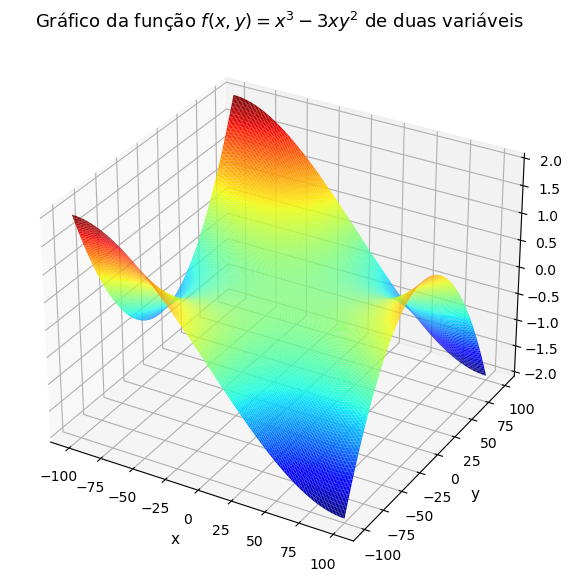

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
f = lambda x, y: x**3 - 3 * x * y**2
x = np.linspace(-100, 100, 200)
y = np.linspace(-100, 100, 200)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='none')
ax.set_title("Gráfico da função $ f(x, y) = x^3 - 3xy^2 $ de duas variáveis", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('z', fontsize = 10)
plt.show()

![Exemplo de gráfico de função de duas variáveis](fig_2-1_exemplo_2.png "Exemplo de gráfico de função de duas variáveis")

### $ 7.2 $ Esboço de curvas de nível

In [45]:
import numpy as np
import matplotlib.pyplot as plot
import pylab


xs = []     # List of points in x-axis.
ys = []     # List of points in y-axis.
# X and Y points are from -6 to +8 varying in steps of 2.
for val in range(-6, 8, 2):
    xs.append(val)
    ys.append(val)
zs = np.ndarray((7,7))     # List of point is the z-axis.
# Populate z Values (a 7x7 matrix) to create a circle x^2+y^2=z:    
for x in range(0, len(xs)):
    for y in range(0, len(ys)):
        zs[x][y] = (xs[x]* xs[x]) + (ys[y]*ys[y])
# Print x,y and z values
print(xs)
print(ys)
print(zs)
# Set the x axis and y axis limits
pylab.xlim([-10,10])
pylab.ylim([-10,10])
# Provide a title for the contour plot
plot.title('Contour plot')

# Set x axis label for the contour plot
plot.xlabel('X')

# Set y axis label for the contour plot
plot.ylabel('Y')

# Create contour lines or level curves using matplotlib.pyplot module
contours = plot.contour(xs, ys, zs)

# Display z values on contour lines
plot.clabel(contours, inline=1, fontsize=10)

# Display the contour plot
plot.show()

[-6, -4, -2, 0, 2, 4, 6]
[-6, -4, -2, 0, 2, 4, 6]
[[72. 52. 40. 36. 40. 52. 72.]
 [52. 32. 20. 16. 20. 32. 52.]
 [40. 20.  8.  4.  8. 20. 40.]
 [36. 16.  4.  0.  4. 16. 36.]
 [40. 20.  8.  4.  8. 20. 40.]
 [52. 32. 20. 16. 20. 32. 52.]
 [72. 52. 40. 36. 40. 52. 72.]]


### $ 7.3 $ Esboçando o gráfico e projetando curvas de contorno nos planos coordenados

In [63]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
ax.contour(X, Y, Z, zdir='z', offset=-100, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='x', offset=-40, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='y', offset=40, cmap='coolwarm')

ax.set(xlim=(-40, 40), ylim=(-40, 40), zlim=(-100, 100),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()


In [62]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
